In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

tf.keras.backend.set_floatx('float64')

tf.autograph.set_verbosity(0)

dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; dldarkblue =  '#0D5BDC'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]


In [2]:
# Loading data
x=np.array([ 0.    ,2.88 , 5.76 , 8.65 ,11.53 ,14.41 ,17.29 ,20.18 ,23.06 ,25.94 ,28.82 ,31.71
 ,34.59 ,37.47 ,40.35 ,43.24 ,46.12 ,49.  ])
y=np.array([   0.      ,5.55   ,34.39   ,71.39  ,125.52  ,183.03  ,237.25  ,441.08  ,457.14
  ,563.11  ,901.24 ,1025.77  ,890.33 ,1417.39 ,1268.67 ,2242.65 ,2653.83 ,2391.31])

x_ideal = [ 0.    ,2.88  ,5.76  ,8.65 ,11.53 ,14.41 ,17.29 ,20.18 ,23.06 ,25.94 ,28.82 ,31.71
 ,34.59 ,37.47 ,40.35 ,43.24 ,46.12 ,49.  ] 

y_ideal = [   0.      ,8.31   ,33.23   ,74.77  ,132.93  ,207.7   ,299.09  ,407.09  ,531.71
  ,672.94  ,830.8  ,1005.26 ,1196.35 ,1404.04 ,1628.36 ,1869.29 ,2126.84 ,2401.  ]






In [3]:
print(x.shape,y.shape)



(18,) (18,)


In [4]:
# splitting the data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 1)
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)



(12,) (12,)
(6,) (6,)


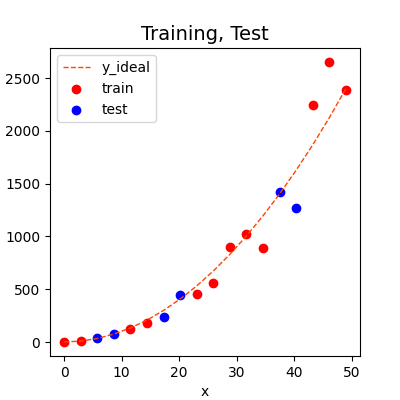

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal",lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, color = "red",           label="train")
ax.scatter(x_test, y_test,   color = 'blue',   label="test")
ax.legend(loc='upper left')
plt.show()

In [6]:
# evaluate meansquared error
def eval_mse(y,yhat):
    m=len(y)
    err=0
    for i in range(len(y)):
        err_i = (y[i]-yhat[i])**2
        err += err_i
        
    return err/(2*m)


In [7]:
y_hat = np.array([2.4,4.2])
y_tmp = np.array([2.3,4.1])
print(eval_mse(y_tmp,y_hat))


0.0050000000000000305


In [8]:
class lin_model:
    def __init__(self, degree, regularization = False, lambda_=0):
        if regularization:
            self.linear_model = Ridge(alpha=lambda_)
        else:
            self.linear_model = LinearRegression()
        self.poly = PolynomialFeatures(degree, include_bias=False)
        self.scaler = StandardScaler() 
        
    def fit(self, X_train,y_train):
        ''' just fits the data. mapping and scaling are not repeated '''
        X_train_mapped = self.poly.fit_transform(X_train.reshape(-1,1))
        X_train_mapped_scaled = self.scaler.fit_transform(X_train_mapped)
        self.linear_model.fit(X_train_mapped_scaled, y_train )

    def predict(self, X):
        X_mapped = self.poly.transform(X.reshape(-1,1))
        X_mapped_scaled = self.scaler.transform(X_mapped)
        yhat = self.linear_model.predict(X_mapped_scaled)
        return(yhat)
    
    def mse(self, y, yhat):
        err = mean_squared_error(y,yhat)/2   #sklean doesn't have div by 2
        return (err)

In [9]:
# creating a model in sklearn, training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(x_train,y_train)

# predict on training data, find training error
yhat = lmodel.predict(x_train)
err_train = lmodel.mse(y_train,yhat)
# predict on test data, find error
yhat = lmodel.predict(x_test)
err_test = lmodel.mse(y_test,yhat)




In [10]:
print(f'trainig err {err_train:0.2f}, test err {err_test:0.2f}')
# this suggests that the model 1) Is overfitting,2)Has high variance 3) generalizes poorly


trainig err 58.72, test err 170586.66


In [11]:
def plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree):
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax.set_title("Poor Performance on Test Data",fontsize = 12)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.scatter(X_train, y_train, color = "red",           label="train")
    ax.scatter(X_test, y_test,        label="test")
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot(x, y_pred,  lw=0.5, label=f"predicted, degree={degree}")
    ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

[0.         0.49494949 0.98989899 1.48484848 1.97979798 2.47474747
 2.96969697 3.46464646 3.95959596 4.45454545]


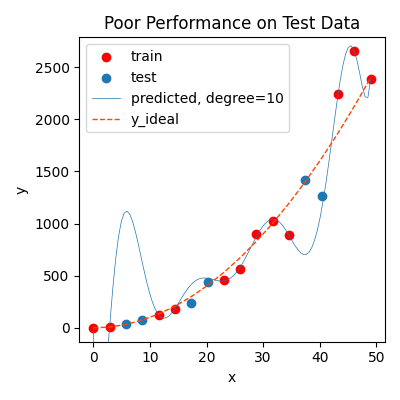

In [12]:
x_ = np.linspace(0,int(x.max()),100) # predict values for plot
print(x_[0:10:1])
y_pred = lmodel.predict(x_).reshape(-1,1)

plt_train_test(x_train,y_train,x_test,y_test,x_,y_pred,x_ideal,y_ideal,degree)

In [13]:
# function for generating data
def gen_data(m, seed=1, scale=0.7):
    """ generate a data set based on a x^2 with added noise """
    c = 0
    x_train = np.linspace(0,49,m)
    np.random.seed(seed)
    y_ideal = x_train**2 + c
    y_train = y_ideal + scale * y_ideal*(np.random.sample((m,))-0.5)
    x_ideal = x_train #for redraw when new data included in X
    return x_train, y_train, x_ideal, y_ideal

In [14]:
x,y,x_ideal,y_ideal = gen_data(40,5,0.7)
print('x.shape',x.shape,'y.shape',y.shape)

# split the data using sklearn routine
x_train,x_,y_train,y_ = train_test_split(x,y,test_size= 0.40 , random_state = 1)
x_cv,x_test,y_cv,y_test= train_test_split(x_,y_,test_size= 0.50,random_state=1)
print('x_train.shape',x_train.shape,'y_train.shape',y_train.shape)
print('x_cv.shape',x_cv.shape, 'y_cv.shape',y_cv.shape)
print('x_test.shape',x_test.shape,'y_test.shape',y_test.shape)

x.shape (40,) y.shape (40,)
x_train.shape (24,) y_train.shape (24,)
x_cv.shape (8,) y_cv.shape (8,)
x_test.shape (8,) y_test.shape (8,)


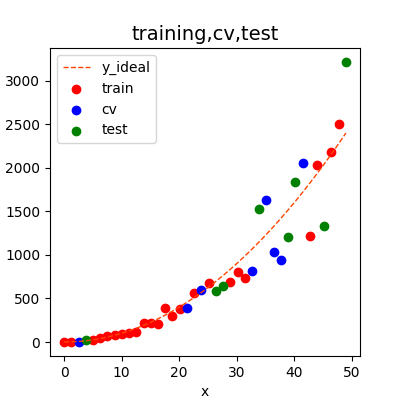

In [15]:
# plot Train,cross-validation,Test
fig,ax= plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal,y_ideal,'--',color='orangered',label='y_ideal',lw=1)
ax.set_title('training,cv,test',fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x_train,y_train,color='red',label = 'train')
ax.scatter(x_cv,y_cv,color = 'blue',label = 'cv')
ax.scatter(x_test,y_test,color='green',label='test')
ax.legend(loc='upper left')
plt.show()


In [16]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(x.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(x_train, y_train)
    yhat = lmodel.predict(x_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(x_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

In [17]:
def plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, err_train, err_cv, optimal_degree, max_degree):
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax[0].set_title("predictions vs data",fontsize = 12)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")

    ax[0].plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
    ax[0].scatter(X_train, y_train, color = "red",           label="train")
    ax[0].scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
    ax[0].set_xlim(ax[0].get_xlim())
    ax[0].set_ylim(ax[0].get_ylim())
    for i in range(0,max_degree):
        ax[0].plot(x, y_pred[:,i],  lw=0.5, label=f"{i+1}")
    ax[0].legend(loc='upper left')

    ax[1].set_title("error vs degree",fontsize = 12)
    cpts = list(range(1, max_degree+1))
    ax[1].plot(cpts, err_train[0:], marker='o',label="train error", lw=2,  color = dlc["dlblue"])
    ax[1].plot(cpts, err_cv[0:],    marker='o',label="cv error",  lw=2, color = dlc["dlorange"])
    ax[1].set_ylim(*ax[1].get_ylim())
    ax[1].axvline(optimal_degree, lw=1, color = dlc["dlmagenta"])
    ax[1].annotate("optimal degree", xy=(optimal_degree,80000),xycoords='data',
                xytext=(0.3, 0.8), textcoords='axes fraction', fontsize=10,
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3", 
                                   color=dlc['dldarkred'], lw=1))
    ax[1].set_xlabel("degree")
    ax[1].set_ylabel("error")
    ax[1].legend(loc='upper left')
    fig.suptitle("Find Optimal Degree",fontsize = 12)
    plt.tight_layout()

    plt.show()

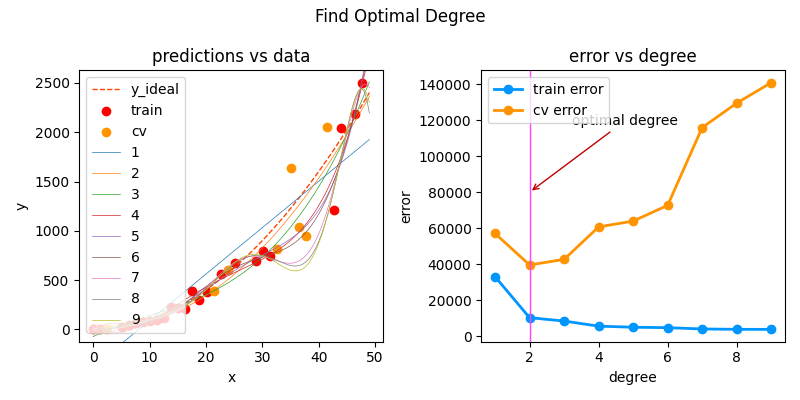

In [18]:
plt.close('all')
plt_optimal_degree(x_train,y_train,x_cv,y_cv,x,y_pred,x_ideal,y_ideal,err_train,err_cv,optimal_degree,max_degree)


In [19]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(x.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(x_train, y_train)
    yhat = lmodel.predict(x_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(x_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

In [20]:
def plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range):
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax[0].set_title("predictions vs data",fontsize = 12)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")

    ax[0].scatter(X_train, y_train, color = "red",           label="train")
    ax[0].scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
    ax[0].set_xlim(ax[0].get_xlim())
    ax[0].set_ylim(ax[0].get_ylim())
#   ax[0].plot(x, y_pred[:,:],  lw=0.5, label=[f"$\lambda =${i}" for i in lambda_range])
    for i in (0,3,7,9):
        ax[0].plot(x, y_pred[:,i],  lw=0.5, label=f"$\lambda =${lambda_range[i]}")
    ax[0].legend()

    ax[1].set_title("error vs regularization",fontsize = 12)
    ax[1].plot(lambda_range, err_train[:], label="train error", color = dlc["dlblue"])
    ax[1].plot(lambda_range, err_cv[:],    label="cv error",    color = dlc["dlorange"])
    ax[1].set_xscale('log')
    ax[1].set_ylim(*ax[1].get_ylim())
    opt_x = lambda_range[optimal_reg_idx]
    ax[1].vlines(opt_x, *ax[1].get_ylim(), color = "black", lw=1)
    ax[1].annotate("optimal lambda", (opt_x,150000), xytext=(-80,10), textcoords="offset points",
                  arrowprops={'arrowstyle':'simple'})
    ax[1].set_xlabel("regularization (lambda)")
    ax[1].set_ylabel("error")
    fig.suptitle("Tuning Regularization",fontsize = 12)
    ax[1].text(0.05,0.44,"High\nVariance",fontsize=12, ha='left',transform=ax[1].transAxes,color = dlc["dlblue"])
    ax[1].text(0.95,0.44,"High\nBias",    fontsize=12, ha='right',transform=ax[1].transAxes,color = dlc["dlblue"])
    ax[1].legend(loc='upper left')
    plt.tight_layout()
    plt.show()

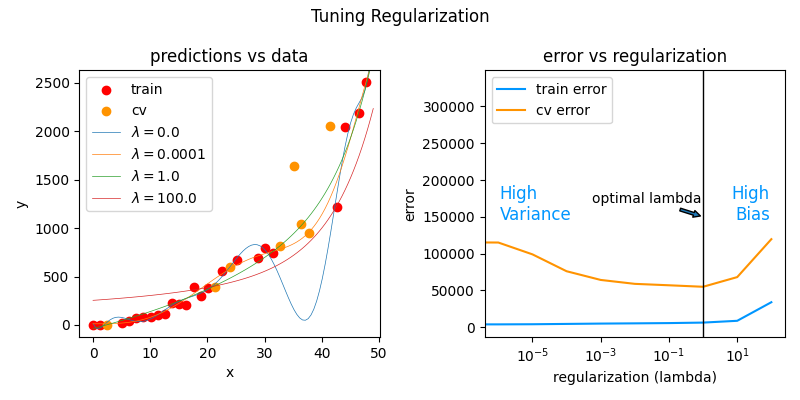

In [21]:
plt.close('all')
plt_tune_regularization(x_train,y_train,x_cv,y_cv,x,y_pred,err_train,err_cv,optimal_reg_idx,lambda_range)

In [22]:
def tune_m():
    """ tune the number of examples to reduce overfitting """
    m = 50
    m_range = np.array(m*np.arange(1,16))
    num_steps = m_range.shape[0]
    degree = 16
    err_train = np.zeros(num_steps)     
    err_cv = np.zeros(num_steps)        
    y_pred = np.zeros((100,num_steps))     
    
    for i in range(num_steps):
        X, y, y_ideal, x_ideal = gen_data(m_range[i],5,0.7)
        x = np.linspace(0,int(X.max()),100)  
        X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
        X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)

        lmodel = lin_model(degree)  # no regularization
        lmodel.fit(X_train, y_train)
        yhat = lmodel.predict(X_train)
        err_train[i] = lmodel.mse(y_train, yhat)
        yhat = lmodel.predict(X_cv)
        err_cv[i] = lmodel.mse(y_cv, yhat)
        y_pred[:,i] = lmodel.predict(x)
    return(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree)

In [23]:
def plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree):
    
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax[0].set_title("predictions vs data",fontsize = 12)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")

    ax[0].scatter(X_train, y_train, color = "red",           s=3, label="train", alpha=0.4)
    ax[0].scatter(X_cv, y_cv,       color = dlc["dlorange"], s=3, label="cv",    alpha=0.4)
    ax[0].set_xlim(ax[0].get_xlim())
    ax[0].set_ylim(ax[0].get_ylim())
    for i in range(0,len(m_range),3):
        ax[0].plot(x, y_pred[:,i],  lw=1, label=f"$m =${m_range[i]}")
    ax[0].legend(loc='upper left')
    ax[0].text(0.05,0.5,f"degree = {degree}", fontsize=10, ha='left',transform=ax[0].transAxes,color = dlc["dlblue"])

    ax[1].set_title("error vs number of examples",fontsize = 12)
    ax[1].plot(m_range, err_train[:], label="train error", color = dlc["dlblue"])
    ax[1].plot(m_range, err_cv[:],    label="cv error",    color = dlc["dlorange"])
    ax[1].set_xlabel("Number of Examples (m)")
    ax[1].set_ylabel("error")
    fig.suptitle("Tuning number of examples",fontsize = 12)
    ax[1].text(0.05,0.5,"High\nVariance",        fontsize=12, ha='left',transform=ax[1].transAxes,color = dlc["dlblue"])
    ax[1].text(0.95,0.5,"Good \nGeneralization", fontsize=12, ha='right',transform=ax[1].transAxes,color = dlc["dlblue"])
    ax[1].legend()
    plt.tight_layout()
    plt.show()

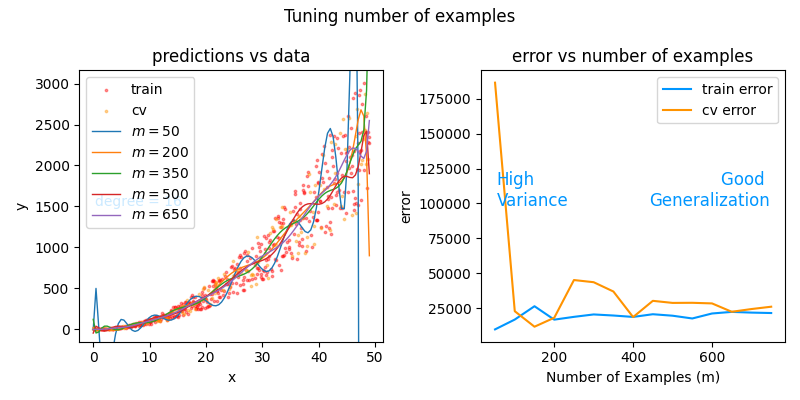

In [24]:
# getting more data
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

In [25]:
# Note that adding more examples when the model has high bias (underfitting) does not improve performance.

In [26]:
from sklearn.datasets import make_blobs

In [27]:
def gen_blobs():
    classes = 6
    m = 800
    std = 0.4
    centers = np.array([[-1, 0], [1, 0], [0, 1], [0, -1],  [-2,1],[-2,-1]])
    X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
    return (X, y, centers, classes, std)

In [28]:
# Evaluating a learning algorithm (neural network)
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


In [29]:
# Evaluating categorical model by calculating classification error

In [30]:
def eval_cat_err(y,yhat):
    m=len(y)
    incorrect = 0
    for i in range(m):
        if y[i] != yhat[i]:
            incorrect +=1
    cerr = incorrect/m
        
    return cerr

In [31]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )


categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


In [32]:
# Graded cell: model
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
    Dense(units=120,activation='relu',name='L1'),
    Dense(units=40,activation = 'relu',name='L2'),
    Dense(units=6,activation='linear',name = 'L3')
    


    ],name='Complex'
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
    

)
model.fit(X_train,y_train, epochs=1000)



Epoch 1/1000
13/13 [==============================] - 3s 10ms/step - loss: 1.0464
Epoch 2/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.4167
Epoch 3/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.3221
Epoch 4/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.2916
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2886
Epoch 6/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.2873
Epoch 7/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.2414
Epoch 8/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.2291
Epoch 9/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.2364
Epoch 10/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.2013
Epoch 11/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.2132
Epoch 12/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.2053
Epoch 13/1000


13/13 [==============================] - 0s 10ms/step - loss: 0.1002
Epoch 199/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1150
Epoch 200/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1105
Epoch 201/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0971
Epoch 202/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0861
Epoch 203/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0847
Epoch 204/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1111
Epoch 205/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1051
Epoch 206/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1149
Epoch 207/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1643
Epoch 208/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1764
Epoch 209/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1742
Epoch 210/1000
13

13/13 [==============================] - 0s 7ms/step - loss: 0.0873
Epoch 395/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1025
Epoch 396/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.1025
Epoch 397/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1016
Epoch 398/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0900
Epoch 399/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0927
Epoch 400/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2471
Epoch 401/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1641
Epoch 402/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1253
Epoch 403/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1009
Epoch 404/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0704
Epoch 405/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0591
Epoch 406/1000
13

13/13 [==============================] - 0s 6ms/step - loss: 0.0550
Epoch 591/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 592/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0720
Epoch 593/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0484
Epoch 594/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0348
Epoch 595/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0349
Epoch 596/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0374
Epoch 597/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0350
Epoch 598/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0369
Epoch 599/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0321
Epoch 600/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0387
Epoch 601/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0401
Epoch 602/1000

13/13 [==============================] - 0s 6ms/step - loss: 0.0275
Epoch 787/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 788/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0280
Epoch 789/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 790/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0189
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0222
Epoch 792/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0234
Epoch 793/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0239
Epoch 794/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0173
Epoch 795/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0190
Epoch 796/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 797/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 798/1000
13/1

13/13 [==============================] - 0s 8ms/step - loss: 0.0276
Epoch 983/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0261
Epoch 984/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0274
Epoch 985/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0289
Epoch 986/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0270
Epoch 987/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0264
Epoch 988/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0267
Epoch 989/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 990/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0286
Epoch 991/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0267
Epoch 992/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0280
Epoch 993/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0274
Epoch 994/1000
13/

In [33]:
model.summary()

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)


In [35]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}" )


10/10 [==============================] - 0s 4ms/step
categorization error, training, complex model: 0.010
categorization error, cv,       complex model: 0.109


In [36]:
# Model_s
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(units=6,activation='relu',name='L1'),
        Dense(units=6,activation='relu',name='L2'),
        
    ],name= 'Simple'


)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer=tf.keras.optimizers.Adam(0.01),

)





In [37]:
import logging
logging.getLogger('tensorflow').setLevel('ERROR')

model_s.fit(
    X_train,y_train,epochs=1000


)

Epoch 1/1000
13/13 [==============================] - 1s 6ms/step - loss: 1.6560
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 1.4956
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 1.3735
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.2614
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 1.1035
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9421
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.8429
Epoch 8/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.7750
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7320
Epoch 10/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.6996
Epoch 11/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.6744
Epoch 12/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.6565
Epoch 13/1000
13/13 [===

13/13 [==============================] - 0s 6ms/step - loss: 0.1972
Epoch 199/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1987
Epoch 200/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1943
Epoch 201/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1940
Epoch 202/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1931
Epoch 203/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1939
Epoch 204/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1945
Epoch 205/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1937
Epoch 206/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1960
Epoch 207/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1929
Epoch 208/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1983
Epoch 209/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1919
Epoch 210/1000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.1835
Epoch 395/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1835
Epoch 396/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.1879
Epoch 397/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1909
Epoch 398/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1873
Epoch 399/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1856
Epoch 400/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1871
Epoch 401/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1844
Epoch 402/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1851
Epoch 403/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1842
Epoch 404/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1855
Epoch 405/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1824
Epoch 406/1000
13/

13/13 [==============================] - 0s 5ms/step - loss: 0.1871
Epoch 591/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1840
Epoch 592/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1835
Epoch 593/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1838
Epoch 594/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1832
Epoch 595/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1848
Epoch 596/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1831
Epoch 597/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1832
Epoch 598/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1817
Epoch 599/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1804
Epoch 600/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1839
Epoch 601/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1818
Epoch 602/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1851
Epoch 787/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1836
Epoch 788/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1789
Epoch 789/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1818
Epoch 790/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1829
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1794
Epoch 792/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1813
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1820
Epoch 794/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1893
Epoch 795/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1785
Epoch 796/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1874
Epoch 797/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1791
Epoch 798/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1803
Epoch 983/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1820
Epoch 984/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1791
Epoch 985/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1779
Epoch 986/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1809
Epoch 987/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1790
Epoch 988/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1800
Epoch 989/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1812
Epoch 990/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1780
Epoch 991/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1817
Epoch 992/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1808
Epoch 993/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1793
Epoch 994/1000
13/1

In [38]:
model_s.summary()


Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 6)                 18        
                                                                 
 L2 (Dense)                  (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)


In [40]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 4ms/step
categorization error, training, simple model, 0.070, complex model: 0.010
categorization error, cv,       simple model, 0.072, complex model: 0.109


In [41]:
# Regularization

tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(units=120,activation='relu',name='L1'),
        Dense(units=40,activation = 'relu',name='L2'),
        Dense(units=6,activation = 'linear',name='L3')
    ],name = 'ComplexRegularizer'


)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer=tf.keras.optimizers.Adam(0.01)


)

In [42]:
model_r.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 2s 10ms/step - loss: 0.9901
Epoch 2/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3880
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3163
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2644
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2528
Epoch 6/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2796
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2439
Epoch 8/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2292
Epoch 9/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2306
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1959
Epoch 11/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2133
Epoch 12/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2083
Epoch 13/1000
13/13 [===

13/13 [==============================] - 0s 7ms/step - loss: 0.0944
Epoch 199/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1116
Epoch 200/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1226
Epoch 201/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1166
Epoch 202/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1053
Epoch 203/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0918
Epoch 204/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0905
Epoch 205/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1034
Epoch 206/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1041
Epoch 207/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1071
Epoch 208/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1315
Epoch 209/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1303
Epoch 210/1000
13/1

13/13 [==============================] - 0s 9ms/step - loss: 0.0545
Epoch 395/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0571
Epoch 396/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0577
Epoch 397/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0595
Epoch 398/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0661
Epoch 399/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0613
Epoch 400/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0721
Epoch 401/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1249
Epoch 402/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1080
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0985
Epoch 404/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0685
Epoch 405/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0647
Epoch 406/1000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.0296
Epoch 591/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0312
Epoch 592/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0331
Epoch 593/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 594/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 595/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0307
Epoch 596/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0371
Epoch 597/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 598/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0298
Epoch 599/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0339
Epoch 600/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0317
Epoch 601/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0386
Epoch 602/1000
13/

13/13 [==============================] - 0s 6ms/step - loss: 0.0577
Epoch 787/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0958
Epoch 788/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0754
Epoch 789/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0274
Epoch 790/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0275
Epoch 791/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0297
Epoch 792/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0276
Epoch 793/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0214
Epoch 794/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0206
Epoch 795/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0214
Epoch 796/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 797/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0204
Epoch 798/1000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.0170
Epoch 983/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0154
Epoch 984/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 985/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 986/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0198
Epoch 987/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0200
Epoch 988/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 989/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0215
Epoch 990/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0244
Epoch 991/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0219
Epoch 992/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0193
Epoch 993/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 994/1000
13/1

In [43]:
model_r.summary()


Model: "ComplexRegularizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)


In [45]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 7ms/step
categorization error, training, regularized: 0.005, simple model, 0.070, complex model: 0.010
categorization error, cv,       regularized: 0.106, simple model, 0.072, complex model: 0.109


In [46]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear'),
            
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 2s 9ms/step - loss: 1.1096
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4218
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3315
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2893
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2710
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.2816
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2525
Epoch 8/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2263
Epoch 9/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2280
Epoch 10/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1999
Epoch 11/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.2160
Epoch 12/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2033
Epoch 13/1000
13/13 [===

13/13 [==============================] - 0s 9ms/step - loss: 0.1021
Epoch 199/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1077
Epoch 200/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1137
Epoch 201/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0948
Epoch 202/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0892
Epoch 203/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0909
Epoch 204/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0901
Epoch 205/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0920
Epoch 206/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1180
Epoch 207/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1410
Epoch 208/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1205
Epoch 209/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1192
Epoch 210/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.0565
Epoch 395/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0588
Epoch 396/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0695
Epoch 397/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0474
Epoch 398/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0511
Epoch 399/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0472
Epoch 400/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0618
Epoch 401/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1003
Epoch 402/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1202
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1189
Epoch 404/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0734
Epoch 405/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0641
Epoch 406/1000
13

13/13 [==============================] - 0s 6ms/step - loss: 0.0301
Epoch 591/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0351
Epoch 592/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0298
Epoch 593/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0367
Epoch 594/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0286
Epoch 595/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0291
Epoch 596/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0295
Epoch 597/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 598/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0295
Epoch 599/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0285
Epoch 600/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0281
Epoch 601/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0434
Epoch 602/1000
13/

13/13 [==============================] - 0s 6ms/step - loss: 0.0231
Epoch 787/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 788/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0356
Epoch 789/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 790/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0223
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0218
Epoch 792/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0222
Epoch 793/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0188
Epoch 794/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 795/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0186
Epoch 796/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0199
Epoch 797/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0184
Epoch 798/1000
13/1

13/13 [==============================] - 0s 13ms/step - loss: 0.0287
Epoch 983/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0302
Epoch 984/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0260
Epoch 985/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0280
Epoch 986/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0271
Epoch 987/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0290
Epoch 988/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0284
Epoch 989/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0266
Epoch 990/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 991/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0221
Epoch 992/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0229
Epoch 993/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0217
Epoch 994/1000


13/13 [==============================] - 0s 5ms/step - loss: 0.2024
Epoch 181/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2238
Epoch 182/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2116
Epoch 183/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2053
Epoch 184/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2046
Epoch 185/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2053
Epoch 186/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2014
Epoch 187/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2006
Epoch 188/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2033
Epoch 189/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1964
Epoch 190/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2102
Epoch 191/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2165
Epoch 192/1000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.1792
Epoch 377/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1736
Epoch 378/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1817
Epoch 379/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1846
Epoch 380/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1843
Epoch 381/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1830
Epoch 382/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1898
Epoch 383/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2004
Epoch 384/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1966
Epoch 385/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1849
Epoch 386/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1792
Epoch 387/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1835
Epoch 388/1000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.1734
Epoch 573/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1644
Epoch 574/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1655
Epoch 575/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1631
Epoch 576/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1606
Epoch 577/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1735
Epoch 578/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1782
Epoch 579/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1649
Epoch 580/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1762
Epoch 581/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1699
Epoch 582/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1600
Epoch 583/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 584/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1627
Epoch 769/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1509
Epoch 770/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1533
Epoch 771/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1631
Epoch 772/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1501
Epoch 773/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1533
Epoch 774/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1671
Epoch 775/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1872
Epoch 776/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1639
Epoch 777/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1621
Epoch 778/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1657
Epoch 779/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1612
Epoch 780/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1490
Epoch 965/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1548
Epoch 966/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1430
Epoch 967/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1562
Epoch 968/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1592
Epoch 969/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1558
Epoch 970/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1538
Epoch 971/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1485
Epoch 972/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1431
Epoch 973/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1450
Epoch 974/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1534
Epoch 975/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1581
Epoch 976/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2719
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2775
Epoch 164/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2857
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2837
Epoch 166/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2714
Epoch 167/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2767
Epoch 168/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2777
Epoch 169/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2787
Epoch 170/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2805
Epoch 171/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2631
Epoch 172/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2582
Epoch 173/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2875
Epoch 174/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2737
Epoch 359/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2472
Epoch 360/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2701
Epoch 361/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2531
Epoch 362/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2870
Epoch 363/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2847
Epoch 364/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2686
Epoch 365/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2490
Epoch 366/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2492
Epoch 367/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2776
Epoch 368/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2773
Epoch 369/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2620
Epoch 370/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2411
Epoch 555/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2444
Epoch 556/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2363
Epoch 557/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2405
Epoch 558/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2508
Epoch 559/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2753
Epoch 560/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2546
Epoch 561/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2434
Epoch 562/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2534
Epoch 563/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2333
Epoch 564/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2392
Epoch 565/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2395
Epoch 566/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2465
Epoch 751/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2383
Epoch 752/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2605
Epoch 753/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2260
Epoch 754/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2385
Epoch 755/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2297
Epoch 756/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2392
Epoch 757/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2420
Epoch 758/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2316
Epoch 759/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2310
Epoch 760/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2441
Epoch 761/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2518
Epoch 762/1000
13/1

13/13 [==============================] - 0s 12ms/step - loss: 0.2347
Epoch 947/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.2405
Epoch 948/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2521
Epoch 949/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2388
Epoch 950/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2255
Epoch 951/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2264
Epoch 952/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2617
Epoch 953/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2479
Epoch 954/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2388
Epoch 955/1000
13/13 [==============================] - 0s 20ms/step - loss: 0.2227
Epoch 956/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2371
Epoch 957/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2350
Epoch 958/1000
1

13/13 [==============================] - 0s 5ms/step - loss: 0.3667
Epoch 145/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3561
Epoch 146/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3544
Epoch 147/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3752
Epoch 148/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3595
Epoch 149/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3547
Epoch 150/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3546
Epoch 151/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3525
Epoch 152/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3483
Epoch 153/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3732
Epoch 154/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3510
Epoch 155/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3533
Epoch 156/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3316
Epoch 341/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3266
Epoch 342/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3331
Epoch 343/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3221
Epoch 344/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3186
Epoch 345/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3176
Epoch 346/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3235
Epoch 347/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3374
Epoch 348/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3477
Epoch 349/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3105
Epoch 350/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3359
Epoch 351/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3147
Epoch 352/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3105
Epoch 537/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3586
Epoch 538/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3181
Epoch 539/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2956
Epoch 540/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3152
Epoch 541/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3263
Epoch 542/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3305
Epoch 543/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3252
Epoch 544/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3165
Epoch 545/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3058
Epoch 546/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3169
Epoch 547/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3362
Epoch 548/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3064
Epoch 733/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2980
Epoch 734/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3242
Epoch 735/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3108
Epoch 736/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3172
Epoch 737/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3282
Epoch 738/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3060
Epoch 739/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3060
Epoch 740/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3080
Epoch 741/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3261
Epoch 742/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3500
Epoch 743/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3008
Epoch 744/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2988
Epoch 929/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3048
Epoch 930/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3129
Epoch 931/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3019
Epoch 932/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2988
Epoch 933/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3050
Epoch 934/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3321
Epoch 935/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3096
Epoch 936/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3039
Epoch 937/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2894
Epoch 938/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3097
Epoch 939/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2925
Epoch 940/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.6405
Epoch 28/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6170
Epoch 29/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6099
Epoch 30/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6361
Epoch 31/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6390
Epoch 32/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6448
Epoch 33/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6357
Epoch 34/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6577
Epoch 35/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6346
Epoch 36/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6179
Epoch 37/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5919
Epoch 38/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5761
Epoch 39/1000
13/13 [=========

13/13 [==============================] - 0s 5ms/step - loss: 0.4396
Epoch 225/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4327
Epoch 226/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4212
Epoch 227/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4299
Epoch 228/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3937
Epoch 229/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4086
Epoch 230/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4131
Epoch 231/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4080
Epoch 232/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4129
Epoch 233/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3960
Epoch 234/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3953
Epoch 235/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3917
Epoch 236/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3534
Epoch 421/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3864
Epoch 422/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3970
Epoch 423/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3755
Epoch 424/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3741
Epoch 425/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3662
Epoch 426/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3641
Epoch 427/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3655
Epoch 428/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3714
Epoch 429/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3659
Epoch 430/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3581
Epoch 431/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3536
Epoch 432/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3448
Epoch 617/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3319
Epoch 618/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3766
Epoch 619/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3809
Epoch 620/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3740
Epoch 621/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3445
Epoch 622/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3482
Epoch 623/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3416
Epoch 624/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3346
Epoch 625/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3317
Epoch 626/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3423
Epoch 627/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3537
Epoch 628/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3240
Epoch 813/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3288
Epoch 814/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3477
Epoch 815/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3353
Epoch 816/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3402
Epoch 817/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3484
Epoch 818/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3529
Epoch 819/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3308
Epoch 820/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3618
Epoch 821/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3866
Epoch 822/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3466
Epoch 823/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3517
Epoch 824/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 1.1294
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.0522
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.0054
Epoch 11/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.9862
Epoch 12/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9628
Epoch 13/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9510
Epoch 14/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9560
Epoch 15/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9110
Epoch 16/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9009
Epoch 17/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.9164
Epoch 18/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9175
Epoch 19/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8826
Epoch 20/1000
13/13 [==========

Epoch 108/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5836
Epoch 109/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5693
Epoch 110/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5667
Epoch 111/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5643
Epoch 112/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5571
Epoch 113/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5519
Epoch 114/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5501
Epoch 115/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5512
Epoch 116/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5547
Epoch 117/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5881
Epoch 118/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5809
Epoch 119/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5792
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.5008
Epoch 305/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4585
Epoch 306/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4833
Epoch 307/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4618
Epoch 308/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4455
Epoch 309/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4562
Epoch 310/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4504
Epoch 311/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4415
Epoch 312/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4464
Epoch 313/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4535
Epoch 314/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4543
Epoch 315/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4468
Epoch 316/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4222
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4061
Epoch 502/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4166
Epoch 503/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4439
Epoch 504/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4540
Epoch 505/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4440
Epoch 506/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4491
Epoch 507/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4869
Epoch 508/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4139
Epoch 509/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4149
Epoch 510/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4082
Epoch 511/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4200
Epoch 512/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3854
Epoch 697/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3933
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4166
Epoch 699/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3966
Epoch 700/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3802
Epoch 701/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3948
Epoch 702/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3865
Epoch 703/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3721
Epoch 704/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4011
Epoch 705/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3946
Epoch 706/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3976
Epoch 707/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4093
Epoch 708/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3938
Epoch 893/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3907
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3778
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4472
Epoch 896/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3963
Epoch 897/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3902
Epoch 898/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4034
Epoch 899/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3967
Epoch 900/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3885
Epoch 901/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4160
Epoch 902/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4140
Epoch 903/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4160
Epoch 904/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.6887
Epoch 90/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6852
Epoch 91/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6979
Epoch 92/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6756
Epoch 93/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6793
Epoch 94/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6665
Epoch 95/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6717
Epoch 96/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6581
Epoch 97/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6564
Epoch 98/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6684
Epoch 99/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6913
Epoch 100/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6996
Epoch 101/1000
13/13 [=======

13/13 [==============================] - 0s 4ms/step - loss: 0.5757
Epoch 189/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5753
Epoch 190/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5620
Epoch 191/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5803
Epoch 192/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5729
Epoch 193/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5718
Epoch 194/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5558
Epoch 195/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5541
Epoch 196/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5470
Epoch 197/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5570
Epoch 198/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5490
Epoch 199/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5560
Epoch 200/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4716
Epoch 385/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4837
Epoch 386/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4692
Epoch 387/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4881
Epoch 388/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4920
Epoch 389/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4798
Epoch 390/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4673
Epoch 391/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4703
Epoch 392/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4761
Epoch 393/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4733
Epoch 394/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4735
Epoch 395/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4924
Epoch 396/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4583
Epoch 581/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4895
Epoch 582/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4733
Epoch 583/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4639
Epoch 584/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4398
Epoch 585/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4605
Epoch 586/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4857
Epoch 587/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4471
Epoch 588/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4362
Epoch 589/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4164
Epoch 590/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4191
Epoch 591/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4300
Epoch 592/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.4551
Epoch 777/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4591
Epoch 778/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4868
Epoch 779/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4691
Epoch 780/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5085
Epoch 781/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4505
Epoch 782/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4176
Epoch 783/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4229
Epoch 784/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4241
Epoch 785/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4016
Epoch 786/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4078
Epoch 787/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4152
Epoch 788/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4117
Epoch 973/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3923
Epoch 974/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3941
Epoch 975/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3817
Epoch 976/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3920
Epoch 977/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3978
Epoch 978/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3908
Epoch 979/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4134
Epoch 980/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4497
Epoch 981/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4317
Epoch 982/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4318
Epoch 983/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3955
Epoch 984/1000
13/1

In [47]:
def plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv):
    err_train = np.zeros(len(lambdas))
    err_cv = np.zeros(len(lambdas))
    for i in range(len(models)):
        err_train[i] = eval_cat_err(y_train,np.argmax( models[i](X_train), axis=1))
        err_cv[i] = eval_cat_err(y_cv, np.argmax( models[i](X_cv), axis=1))

    fig, ax = plt.subplots(1,1,figsize=(6,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.set_title("error vs regularization",fontsize = 12)
    ax.plot(lambdas, err_train, marker='o', label="train error", color = dlc["dlblue"])
    ax.plot(lambdas, err_cv,    marker='o', label="cv error",    color = dlc["dlorange"])
    ax.set_xscale('log')
    ax.set_ylim(*ax.get_ylim())
    ax.set_xlabel("Regularization (lambda)",fontsize = 14)
    ax.set_ylabel("Error",fontsize = 14)
    ax.legend()
    fig.suptitle("Tuning Regularization",fontsize = 14)
    ax.text(0.05,0.14,"Training Error\nlower than CV",fontsize=12, ha='left',transform=ax.transAxes,color = dlc["dlblue"])
    ax.text(0.95,0.14,"Similar\nTraining, CV",    fontsize=12, ha='right',transform=ax.transAxes,color = dlc["dlblue"])
    plt.show()

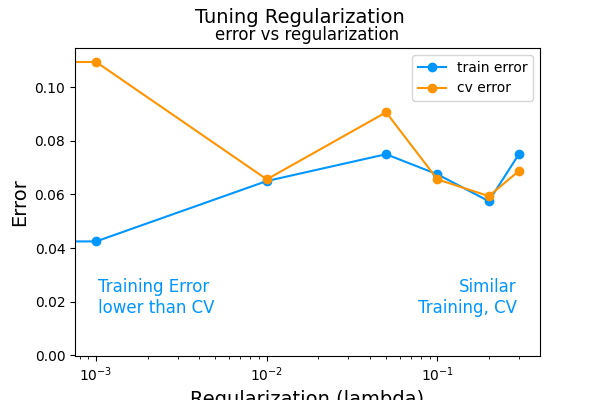

In [48]:
# Test 
plot_iterate(lambdas,models,X_train,y_train,X_cv,y_cv)